In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import joblib

In [2]:
def errorCalculate(Origin,Predict):
    correct = 0
    wrong = 0

    for i in range(len(Origin)):
        True_num = Origin[i]
        Cal_num = Predict[i]
        if True_num == Cal_num:
            correct += 1
        else:
            wrong += 1
    print('correct case:',correct,'.Wrong case:' ,wrong,'.' )
    return 0

train_dataset = pd.read_csv("train_dataset.csv")
test_dataset = pd.read_csv("test_dataset.csv")
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('seasonal_vaccine')
test_labels = test_features.pop('seasonal_vaccine')
train_dataset.head()

,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
0,1,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0,3,0,0,1,0,0,1,0.0,1.0
1,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,3,1,0,0,0,0,1,1.0,0.0
2,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0,3,0,0,1,0,1,0,1.0,0.0
3,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,1,1,0,0,0,1,1.0,3.0
4,1,2.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,2,3,0,1,0,0,0,0,1.0,0.0


In [5]:
clf = DecisionTreeClassifier(max_depth=25)
clf.fit(train_features ,train_labels)
s_DT_clf = accuracy_score(train_labels,clf.predict(train_features))
s_DT_clf_test = accuracy_score(test_labels,clf.predict(test_features))
print(s_DT_clf,s_DT_clf_test)

0.9996366279069767 0.6964386659129451


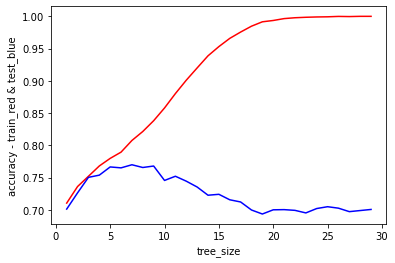

In [6]:
tree_size = []
train_pred_score =[]
test_pred_score =[]
for i in range(1,30):
    tree_size.append(i)
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(train_features ,train_labels)
    s_DT_clf = accuracy_score(train_labels,clf.predict(train_features))
    s_DT_clf_test = accuracy_score(test_labels,clf.predict(test_features))
    train_pred_score.append(s_DT_clf)
    test_pred_score.append(s_DT_clf_test)
plt.plot(tree_size, train_pred_score,'r')
plt.plot(tree_size, test_pred_score,'b')
plt.xlabel('tree_size')
plt.ylabel('accuracy - train_red & test_blue')
plt.show()

In [8]:
clf = DecisionTreeClassifier(max_depth=7)
clf.fit(train_features ,train_labels)
train_predict = clf.predict(train_features)
test_predict = clf.predict(test_features)
test_labels = test_labels.to_numpy()
errorCalculate(train_labels,train_predict)
errorCalculate(test_labels,test_predict)

correct case: 6667 .Wrong case: 1589 .
correct case: 2724 .Wrong case: 814 .


0

In [10]:
filename = 'flu_DecisionTreeClassifier.sav'
joblib.dump(clf, filename)

['flu_DecisionTreeClassifier.sav']